## Understanding the fields

For understanding the signs of the individual magnetic fields, we are simulating a typical DESMEX-like helicopter survey.

In [1]:
# First import the SAEM class and the numpy module
import numpy as np
from saem import CSEMData

In [2]:
df = 0.5  # 0.5/1 for half/full octave
fMin, fMax = 10, 6000
f = np.round(2**np.arange(0, np.log2(fMax/fMin), df) * fMin)
print(f)

[  10.   14.   20.   28.   40.   57.   80.  113.  160.  226.  320.  453.
  640.  905. 1280. 1810. 2560. 3620. 5120.]


In [3]:
x = np.arange(-3000+50, 3000, 100)  # receiver positions
txLen = 3000  # length of the transmitter
self = CSEMData(f=f, rx=x, txPos=np.array([[0, 0], [-txLen/2, txLen/2]]), alt=30)
print(self)

CSEM data with 60 stations and 19 frequencies
Transmitter length 3000m
Sounding pos at -2950.000000,0.000000,-30.000000,


To keep it simple, we want to simulate a homogeneous halfspace of varying resistivity.

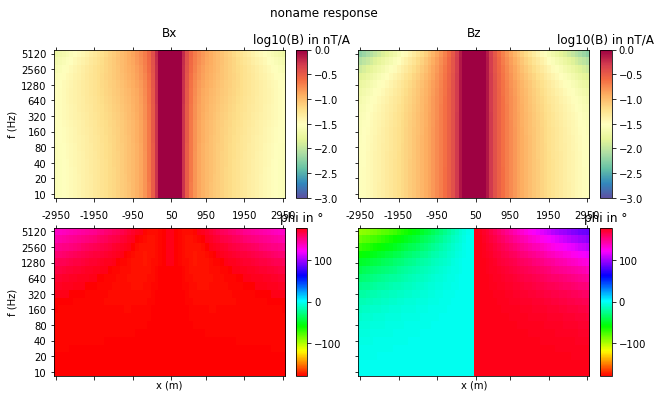

In [4]:
self.cmp = [1, 0, 1]
self.simulate(rho=10000)
self.showLineData(what="response", alim=[-3, 0]);

The amplitudes decay with increasing distance to the transmitter and faster for higher frequencies. Whereas both components exhibit similar magnitudes near the transmitter, the Bz component decays more rapidly, particularly for higher frequencies.

Whereas the phase is symmetric for Bx, it flips at the Tx for Bz. Apart from this flip, the phases are close to zero and approach -90° for higher frequency and offset.

Now want to look at the real and imaginary part. For comparison we define a dictionary that is being used for `showLineData()`.

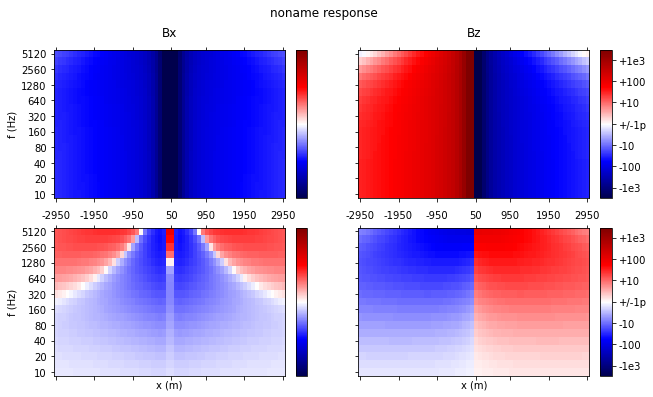

In [5]:
kw = dict(amphi=False, log=True, alim=[3, 3])
self.showLineData(what="response", **kw);

Whereas the real part is positive throughout for Bx, it changes sign at the Tx for Bz. Both components are rather frequency-independent for this high resistivity. The imaginary part of Bz has the opposite sign to the real part and increases with frequency. The imaginary part of Bx, however, shows a more interesting behaviour as it exhibits a sign reversal at an offset that decreases with frequency.

We now want to change resistivity. Note that we can avoid the explicit `showLineData()` call by adding `show=True` and the `kw` dict to the `simulate()` call.

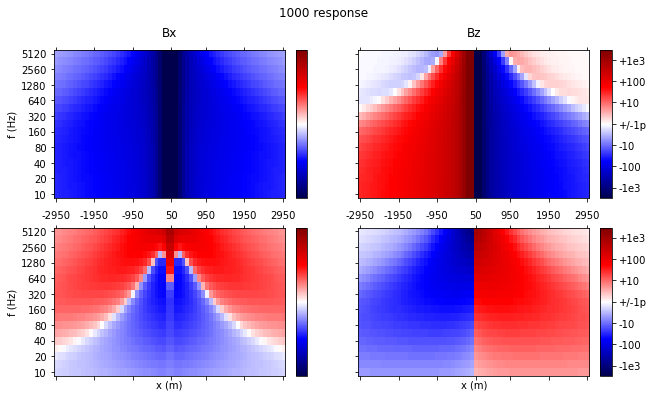

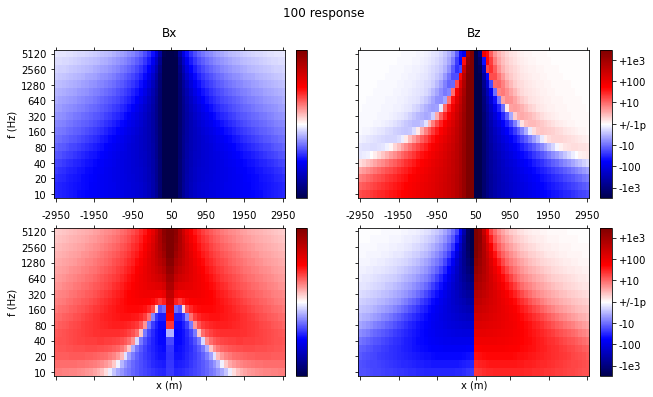

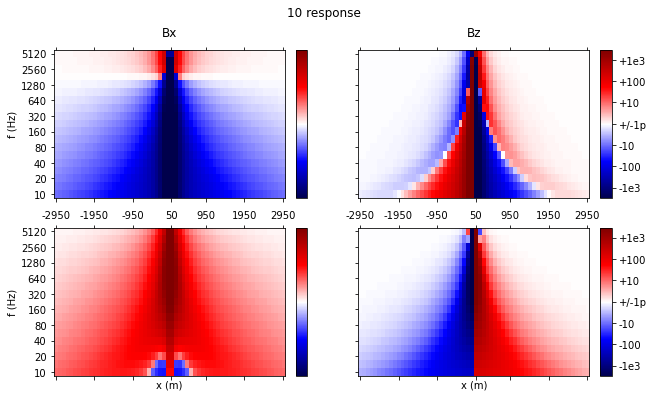

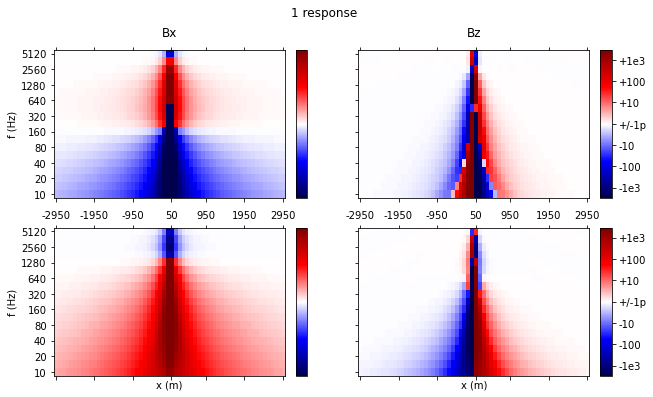

In [6]:
for rho in [1000, 100, 10, 1]:
    self.simulate(rho, show=True, name=str(rho), **kw);

With increasing conductivity (decreasing resistivity), the fields decay faster, particularly for higher frequency. The overall scheme remains the same but the position of the sign reversal in imag(Bx) also moves towards the Tx along with the faster decay.

Finally, we want to simulate a two-layer case with a resistive top layer and a conductor at depth. To this end, we use two resistivities and a thickness value. Similarly we could use an array of n resistiviy value and an array of n-1 thickness values.

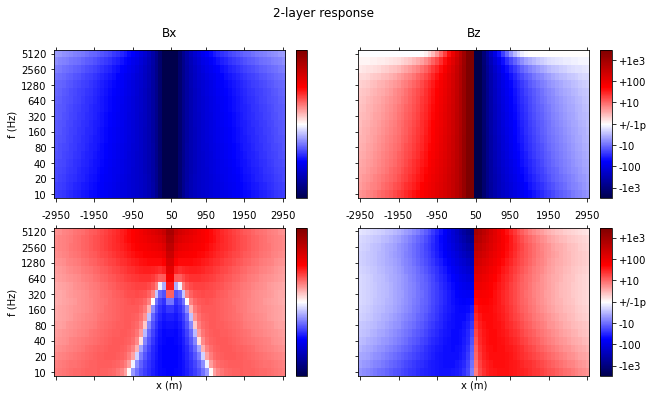

In [7]:
self.simulate(rho=[1000, 10], thk=300, show=True, name="2-layer", **kw);

Compared to the 1000 Ohmm case, the real part of Bx seems identical, the imaginary part of Bx is similar but with shorter sign-reversals for low frequencies that penetrate deep enough.

The contrary happens to the real part of Bz, because obviously the current is trapped in the good conductor. The most interesting part is the imaginary part of Bz, where two separate maxima are visible.

Note that the forward response is stored in `self.RESP` so that it can be compared to measured data stored in `self.DATA`. Suppose we measured the 2-layer case by setting:

In [8]:
self.DATA = self.RESP

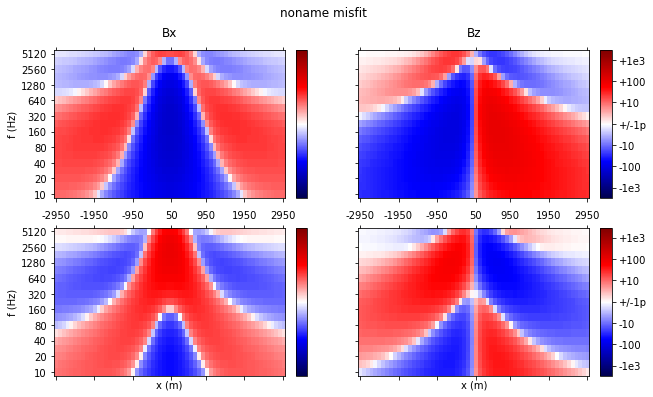

In [11]:
# To show the difference to the background halfspace we display the misfit
self.simulate(1000)
self.showLineData(what="misfit", **kw);